## CPE311 Computational Thinking with Python

Name: Adrian Justin M. Bulambao

Performed on: 04/13/2025

Submitted on: 04/13/2025

Submitted to: Engr. Roman M. Richard

# Instructions:

Create a Python notebook to answer all shown procedures, exercises and analysis in this section

# Resources:

Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv 

# Procedures:
    9.1 Introduction to Matplotlib
    
    9.2 Plotting with Pandas
    
    9.3 Pandas Plotting Subpackage

# 9.1 Introduction to Matplotlib

## Getting Started with Matplotlib



We need matplotlib.pylot for plotting.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## About the  Data

In this notebook, we will be working with 2 datasets:




*   Facebook's stock price throughout 2018 (obtained using the stock_analysis package)


*   Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)



## Plotting Lines

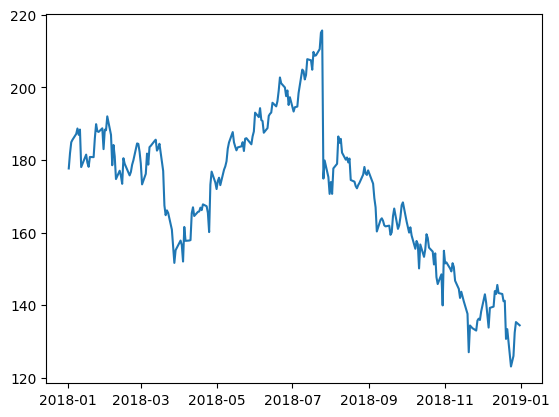

In [2]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
plt.plot(fb.index, fb.open)
plt.show()

Since we are working in a Jupyter notebook, we can use the magic command %matplotlib inline once and not have to call plt.show() for each plot.

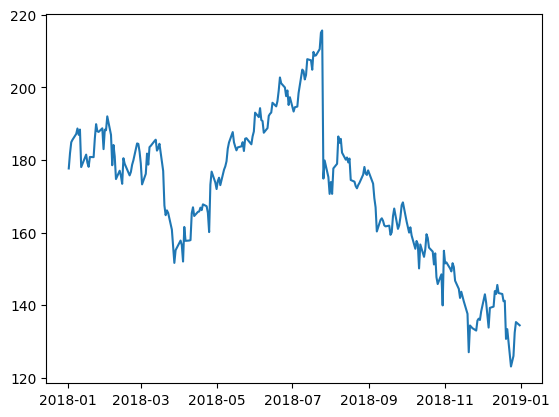

In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)
plt.show()

## Scatter plots


We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'. For example, we can make a black dashed line with 'k--' or a red
scatter plot with 'ro' :

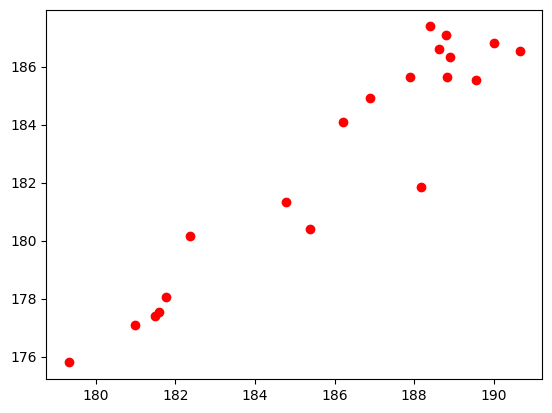

In [4]:
plt.plot('high', 'low', 'ro', data=fb.head(20))
plt.show()

## Histograms

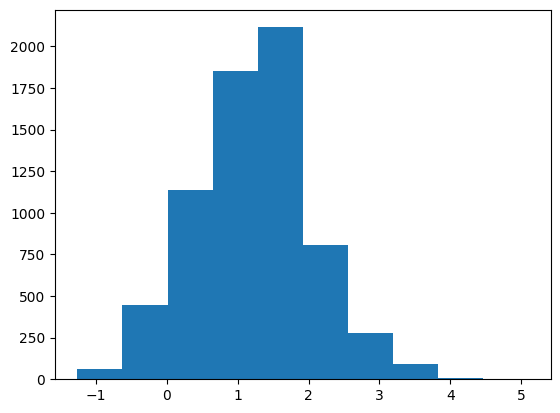

In [5]:
quakes = pd.read_csv('earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)
plt.show()

## Bin size matters


Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot):

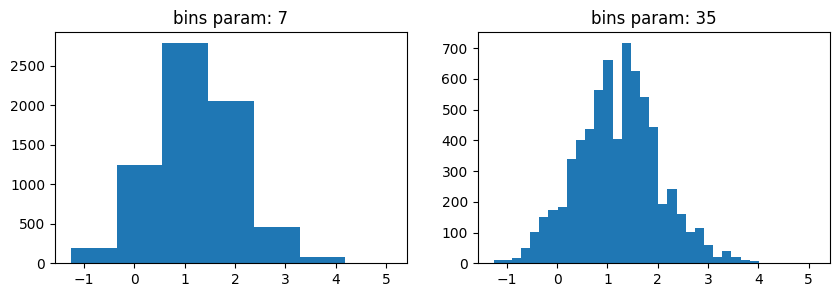

In [6]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')
plt.show()

## Plot components


## Figure


Top-level object that holds the other plot components.


In [7]:

fig = plt.figure()

## Axes



Individual plots contained within the Figure .

## Creating subplots



Simply specify the number of rows and columns to create:

<Figure size 640x480 with 0 Axes>

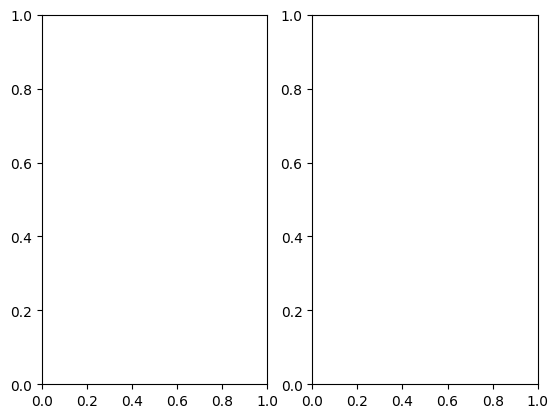

In [8]:
fig, axes = plt.subplots(1, 2)
plt.show()

As an alternative to using plt.subplots() we can add the Axes to the Figure on our own. This allows for some more complex layouts, such as picture in picture:

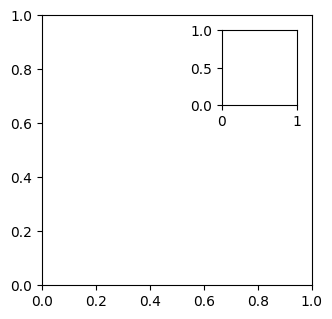

In [9]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])
plt.show()

## Creating Plot Layouts with gridspec


We can create subplots with varying sizes as well:

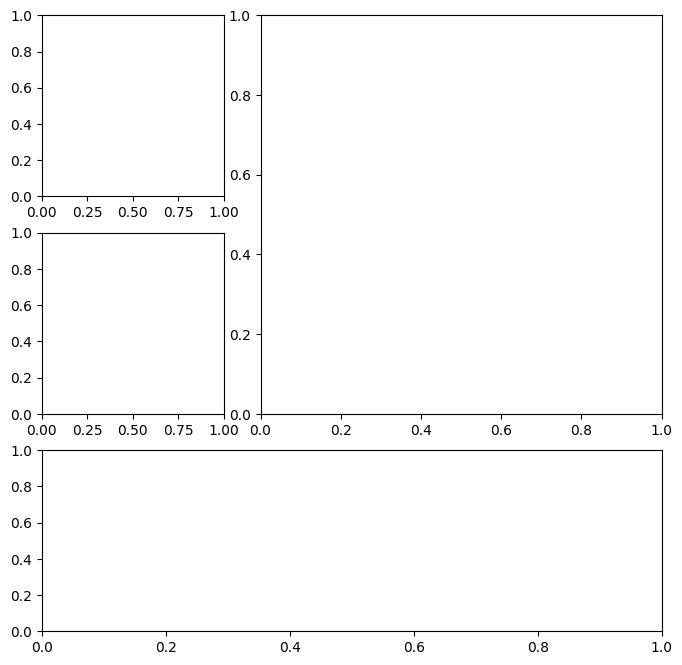

In [10]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])
plt.show()


## Saving plots


Use plt.savefig() to save the last created plot. To save a specific Figure object, use its savefig() method.


In [11]:
fig.savefig('empty.png')

## Cleaning up



It's important to close resources when we are done with them. We use plt.close() to do so. If we pass in nothing, it will close the last plot, but we can pass the specific
Figure to close or say 'all' to close all Figure objects that are open. Let's close all the Figure objects that are open with plt.close() :

In [12]:
plt.close('all')

## Additional plotting options

# Specifying figure size


Just pass the figsize parameter to plt.figure() . It's a tuple of (width, height):

In [13]:
fig = plt.figure(figsize=(10, 4))

This can be specified when creating subplots as well:

<Figure size 1000x400 with 0 Axes>

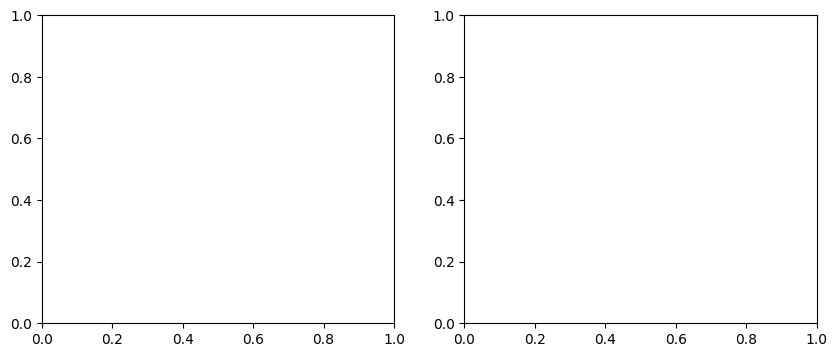

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.show()

## rcParams

A small subset of all the available plot settings (shuffling to get a good variation of options):

In [15]:
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.edgecolor',
 'axes.titleweight',
 'boxplot.whiskerprops.linestyle',
 'date.autoformatter.day',
 'figure.constrained_layout.hspace',
 'figure.titlesize',
 'image.interpolation_stage',
 'keymap.copy',
 'legend.framealpha',
 'legend.handleheight',
 'lines.dash_joinstyle',
 'lines.markerfacecolor',
 'mathtext.default',
 'mathtext.fallback',
 'pdf.compression',
 'svg.fonttype',
 'text.usetex',
 'yaxis.labellocation',
 'ytick.major.size',
 'ytick.minor.visible']

We can check the current default figsize using rcParams :

In [16]:
mpl.rcParams['figure.figsize']


[6.4, 4.8]

We can also update this value to change the default (until the kernel is restarted):


In [17]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use rcdefaults() to restore the defaults:

In [18]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via pyplot :


In [19]:
plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults() # reset the default

# 9.2 Plotting with Pandas

## Plotting with Pandas

The plot() method is available on Series and DataFrame objects. Many of the parameters get passed down to matplotlib. The kind argument let's us vary the plot
type



About the Data
In this notebook, we will be working with 2 datasets:



*   Facebook's stocks price throughout 2018 (obtained using the stock_anaylsis package)
*   Earthquake  date from September 18, 2018 - October 13, 2018 (obtained from the Geological Survery (USGS) using the USGS API)



## Setup

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes.csv')


## Evolution over time


Line plots help us see how a variable changes over time. They are the default for the kind argument, but we can pass kind='line' to be explicit in our intent:

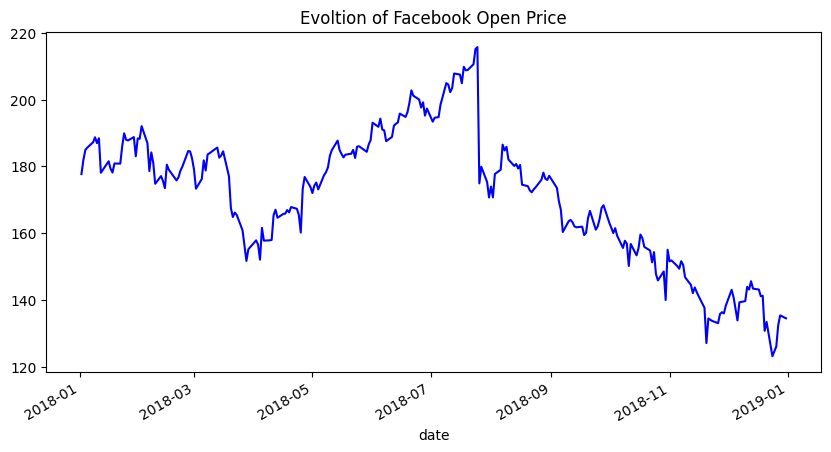

In [21]:
fb.plot(
    kind = 'line',
    y='open',
    figsize=(10, 5),
    style='b-',
    legend=False,
    title='Evoltion of Facebook Open Price'
)
plt.show()

We provided the style argument in the previous example; however, we can use the color and linestyle arguments to get the same result:

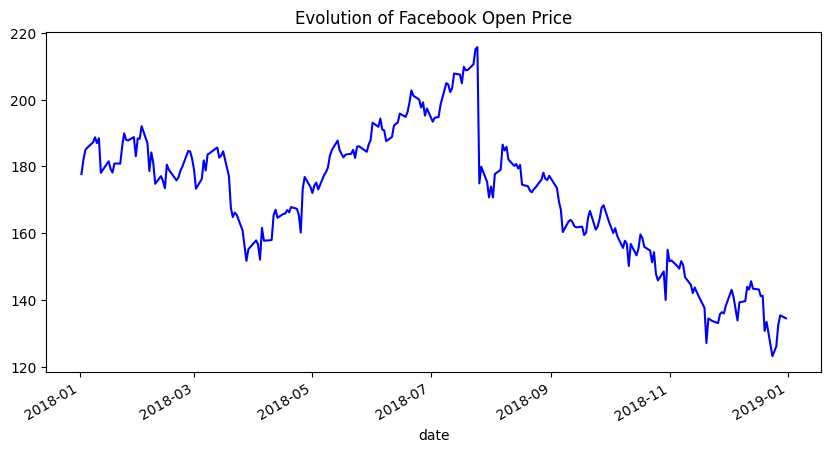

In [22]:

fb.plot(
 kind='line',
 y='open',
 figsize=(10, 5),
 color='blue',
 linestyle='solid',
 legend=False,
 title='Evolution of Facebook Open Price'
)
plt.show()

We can also plot many lines at once by simply passing a list of the columns to plot:

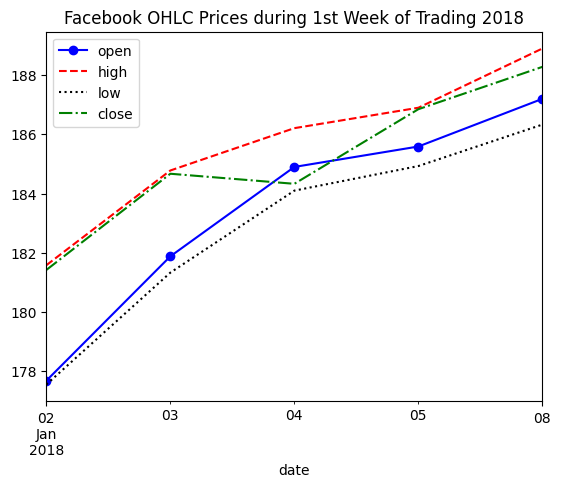

In [23]:
fb.iloc[:5,].plot(
 y=['open', 'high', 'low', 'close'],
 style=['b-o', 'r--', 'k:', 'g-.'],
 title='Facebook OHLC Prices during 1st Week of Trading 2018'
)
plt.show()

## Creating subplots


When plotting with pandas, creating subplots is simply a matter of passing subplots=True to the plot() method, and (optionally) specifying the layout in a tuple of
(rows, columns) :


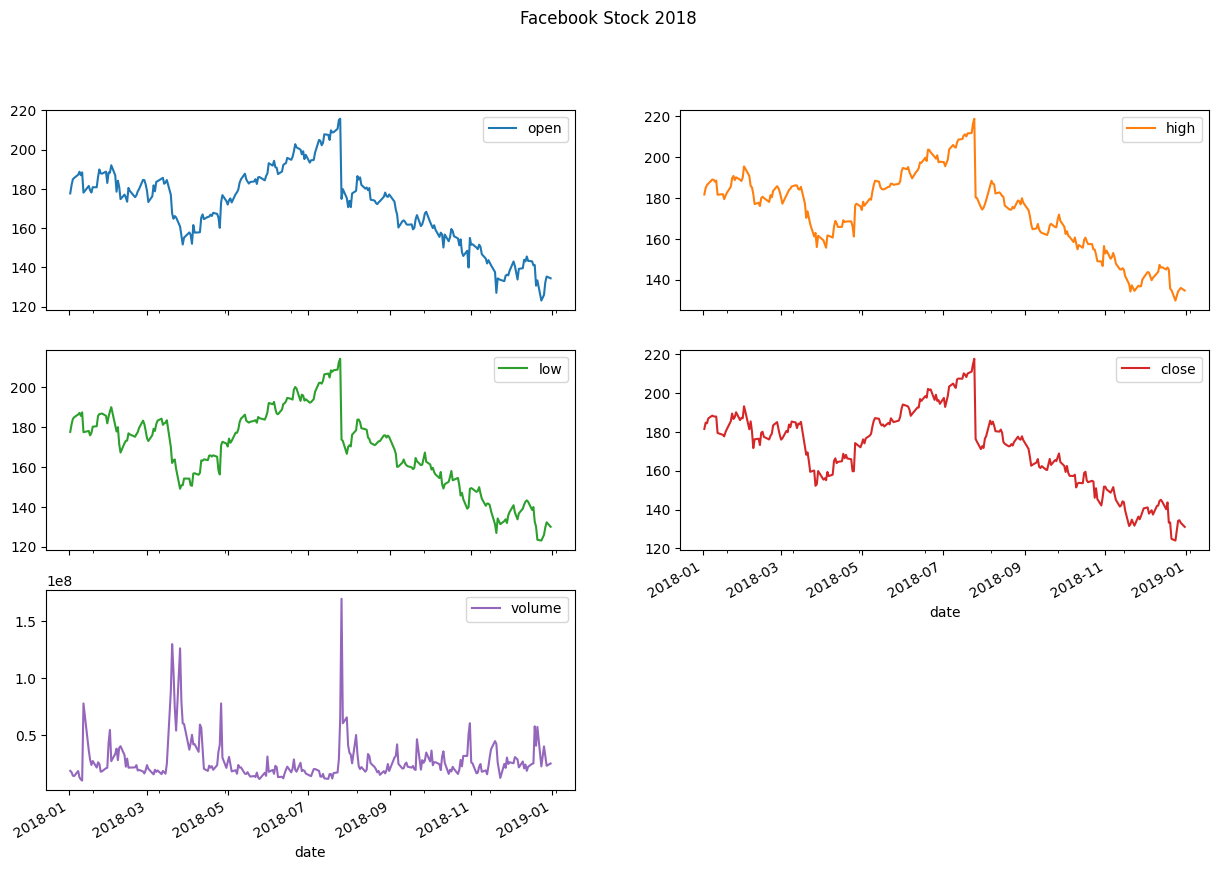

In [24]:
fb.plot(
 kind='line',
 subplots=True,
 layout=(3,2),
 figsize=(15,10),
 title='Facebook Stock 2018'
)
plt.show()

Note that we didn't provide a specific column to plot and pandas plotted all of them for us

### Visualizing relationships between variables



# Scatter plots



We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in kind='scatter' along with a column for the xaxis and a column for the y-axis:


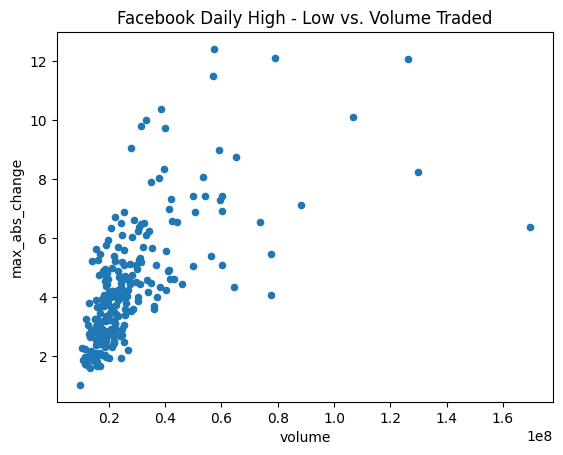

In [25]:
fb.assign(
 max_abs_change=fb.high - fb.low
).plot(
 kind='scatter', x='volume', y='max_abs_change',
 title='Facebook Daily High - Low vs. Volume Traded'
)
plt.show()

The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in
logx=True :

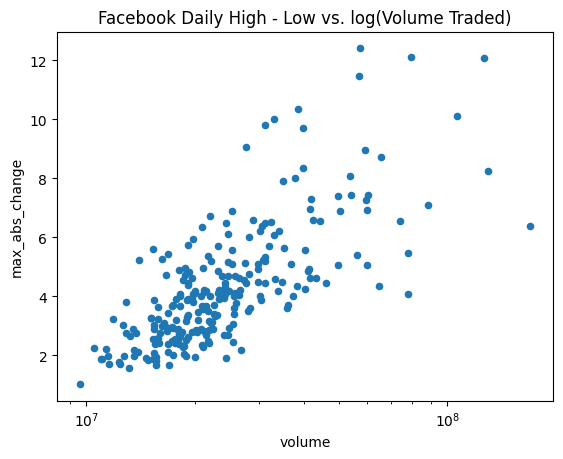

In [26]:
fb.assign(
 max_abs_change=fb.high - fb.low
).plot(
 kind='scatter', x='volume', y='max_abs_change',
 title='Facebook Daily High - Low vs. log(Volume Traded)',
 logx=True
)
plt.show()

With matplotlib, we could use plt.xscale('log') to do the same thing.

## Adding Transparency to Plots with alpha



Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the
alpha parameter. It is a float on [0, 1] where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter
plot:


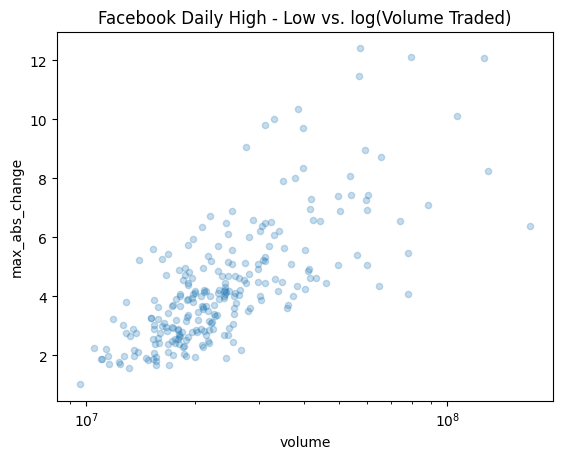

In [27]:
fb.assign(
 max_abs_change=fb.high - fb.low
).plot(
 kind='scatter', x='volume', y='max_abs_change',
 title='Facebook Daily High - Low vs. log(Volume Traded)',
 logx=True, alpha=0.25
)
plt.show()

## Hexbins


In the previous example, we can start to see the overlaps, but it is still difficult. Hexbins are another plot type that divide up the plot into hexagons, which are shaded
according to the density of points there. With pandas, this is the hexbin value for the kind argument. It can also be important to tweak the gridsize , which determines
the number of hexagons along the y-axis:

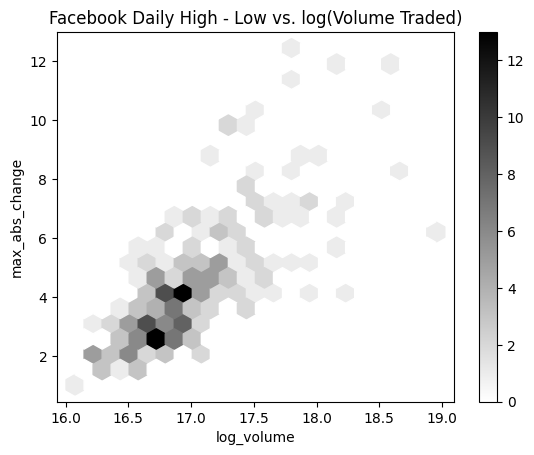

In [28]:
fb.assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).plot(
 kind='hexbin',
 x='log_volume',
 y='max_abs_change',
 title='Facebook Daily High - Low vs. log(Volume Traded)',
 colormap='gray_r',
 gridsize=20,
 sharex=False # we have to pass this to see the x-axis due to a bug in this version of pandas
)
plt.show()

## Visualizing Correlations with Heatmaps


Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use matshow() from matplotlib:

C:\Users\Arnel Bulambao\AppData\Local\Temp\ipykernel_3564\1741648857.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels, rotation=45)
C:\Users\Arnel Bulambao\AppData\Local\Temp\ipykernel_3564\1741648857.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


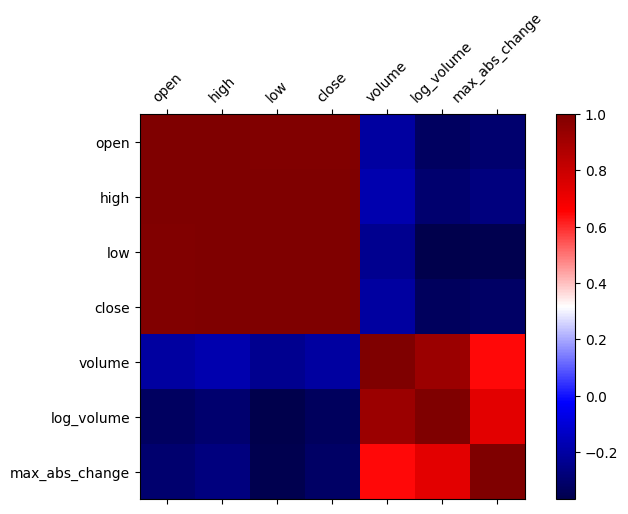

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()
im = ax.matshow(fb_corr, cmap='seismic')
fig.colorbar(im)
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)
plt.show()

## Visualizing distributions

## Histograms


With the pandas plot() method, making histograms is as easy as passing in kind='hist' :

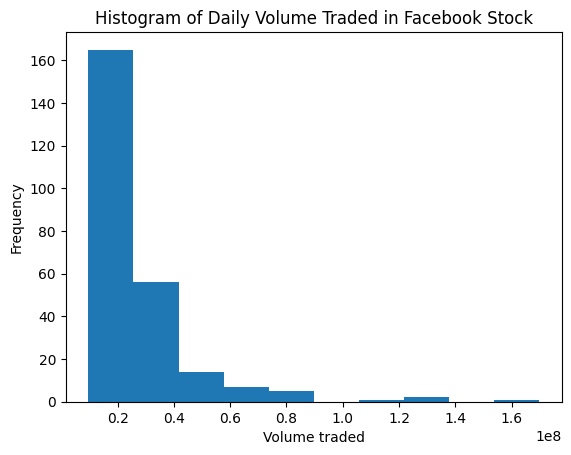

In [30]:
fb.volume.plot(
 kind='hist',
 title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)
plt.show()

We can overlap histograms to compare distributions provided we use the alpha parameter. For example, let's compare the usage and magnitude of the various magTypes
in the data:

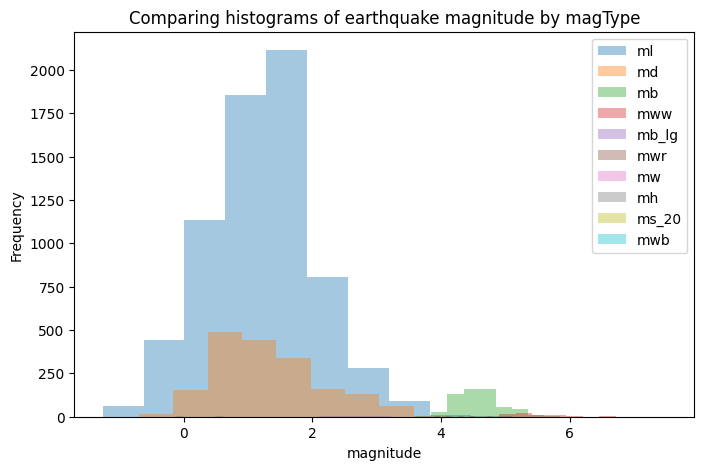

In [31]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
        kind='hist', ax=axes, alpha=0.4,
        label=magtype, legend=True,
        title='Comparing histograms of earthquake magnitude by magType'
        )
plt.xlabel('magnitude') # label the x-axis (discussed in chapter 6)
plt.show()

## Kernel Density Estimation (KDE)

We can pass kind='kde' for a probability density function (PDF), which tells us the probability of getting a particular value:

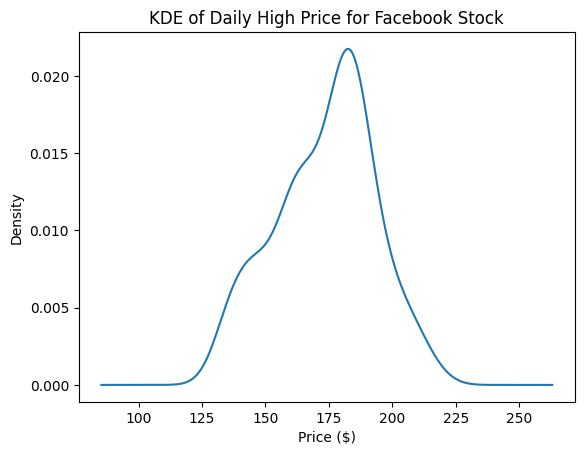

In [32]:
fb.high.plot(
 kind='kde',
 title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)
plt.show()

## Adding to the result of plot()

The plot() method returns a matplotlib Axes object. We can store this for additional customization of the plot, or we can pass this into another call to plot() as the
ax argument to add to the original plot.


It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy:

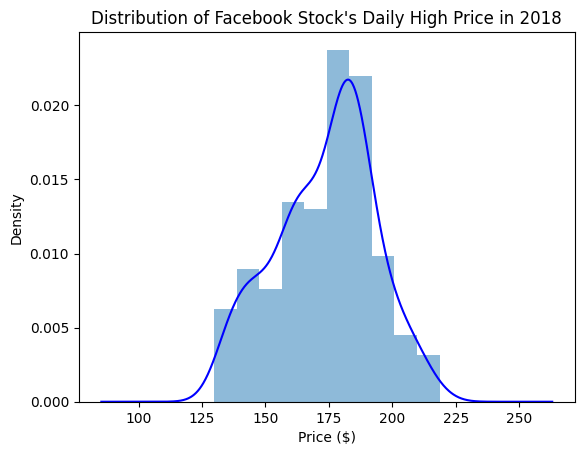

In [33]:

ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
 ax=ax, kind='kde', color='blue',
 title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)
plt.show()

## Plotting the ECDF


In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal), which we can see with the cumulative disribution
function (CDF). Using the statsmodels package, we can estimate the CDF giving us the empirical cumulative distribution function (ECDF):


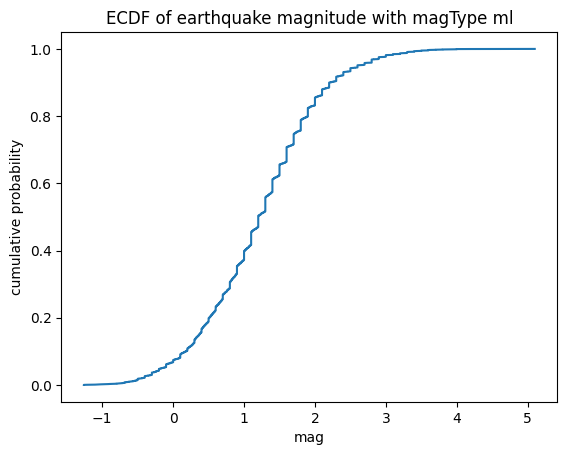

In [34]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')
plt.show()

This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the ml scale is 98%:

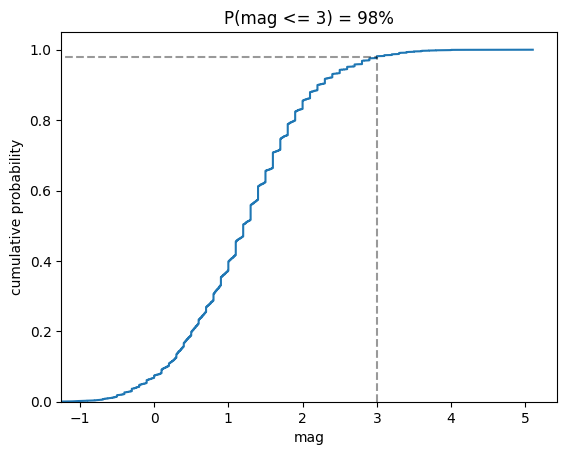

In [35]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
 [3, 3], [0, .98], 'k--',
 [-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)
# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)
# add a title
plt.title('P(mag <= 3) = 98%')
plt.show()

## Box plots


To make box plots with pandas, we pass kind='box' to the plot() method:

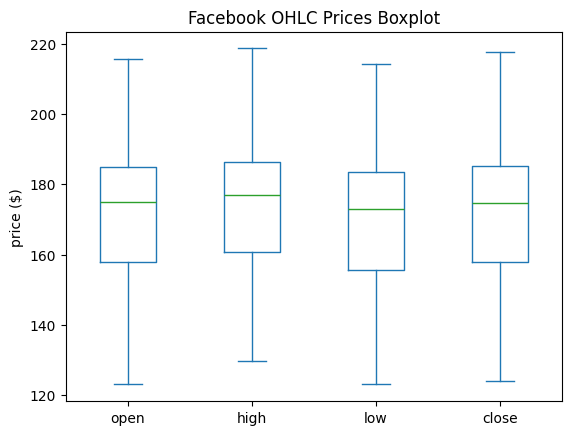

In [36]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)
plt.show()

This can also be combined with a groupby() :

C:\Users\Arnel Bulambao\AppData\Local\Temp\ipykernel_3564\2180763175.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby('volume_bin').boxplot(


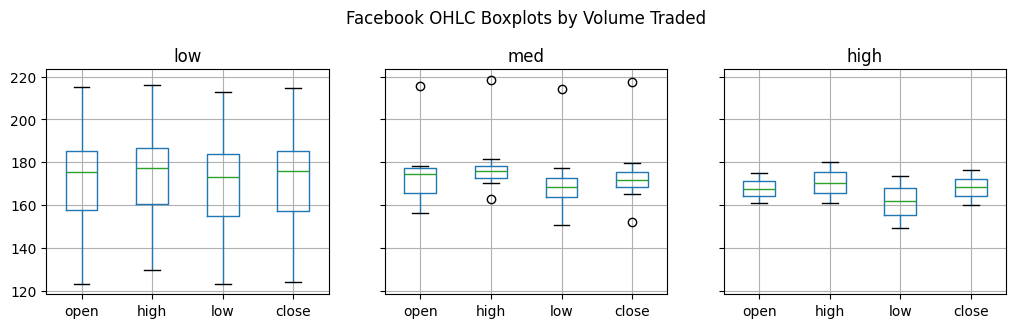

In [37]:
fb.assign(
 volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
 column=['open', 'high', 'low', 'close'],
 layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)
plt.show()

We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

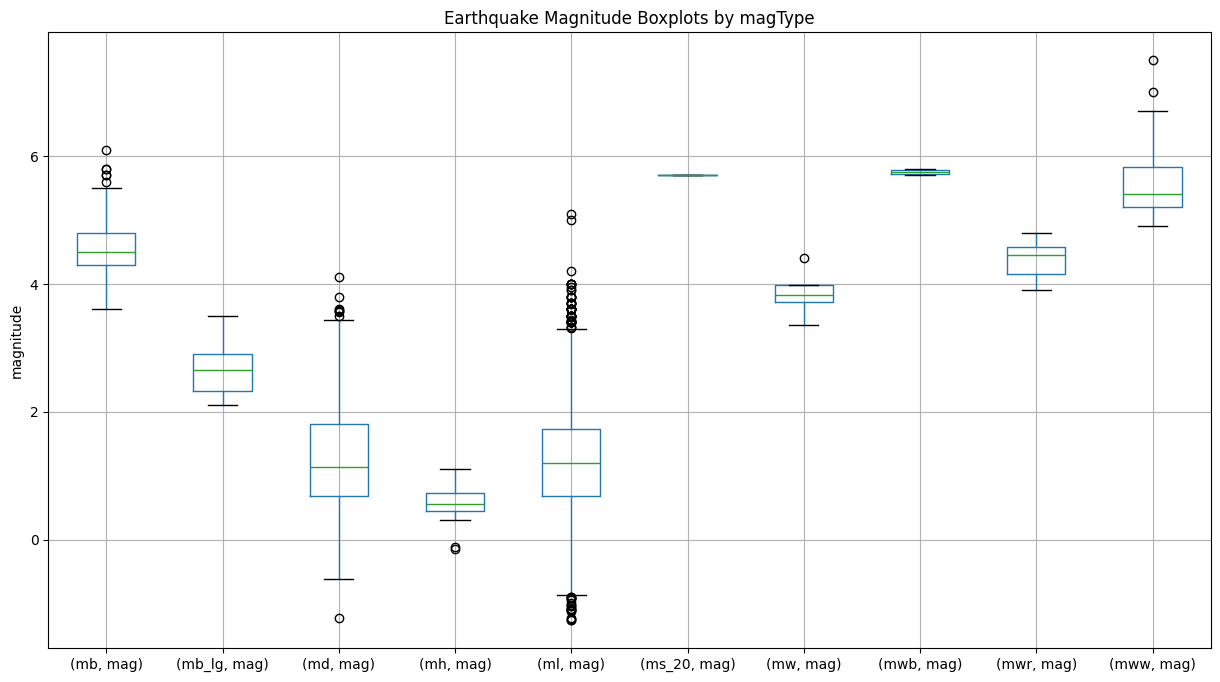

In [38]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
 figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)
plt.show()

## Counts and frequencies

## Bar charts

With pandas, we have the option of using the kinf argument for using plot.<kind>. Let's use plot.bar() here to show the evolution of monthly volume traded in Facebook stock over time:

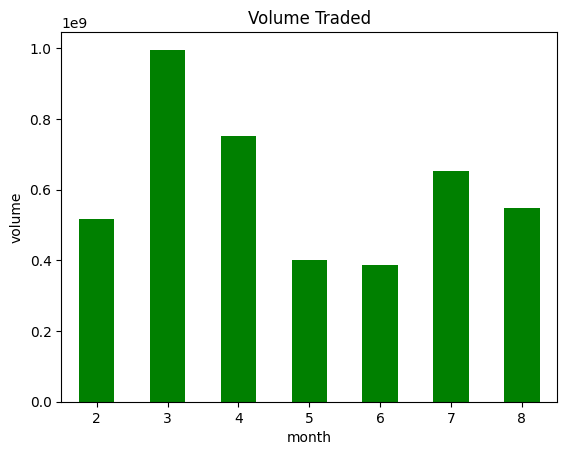

In [39]:
fb['2018-02':'2018-08'].assign(
 month=lambda x: x.index.month
).groupby('month').sum().volume.plot.bar(
 color='green', rot=0, title='Volume Traded'
 )
plt.ylabel('volume') # label the y-axis (discussed in chapter 6)
plt.show()

We can also change the orientation of the bars. Passing kind='barh' gives us horizontal bars instead of vertical ones. Let's use this to look at the top 15 places for
earthquakes in our data:

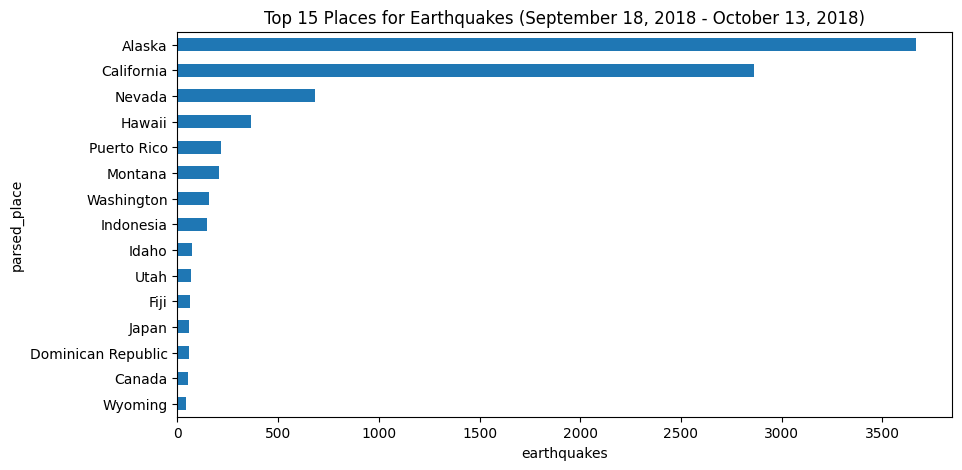

In [40]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
 kind='barh', figsize=(10, 5),
 title='Top 15 Places for Earthquakes '\
 '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)
plt.show()

We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:

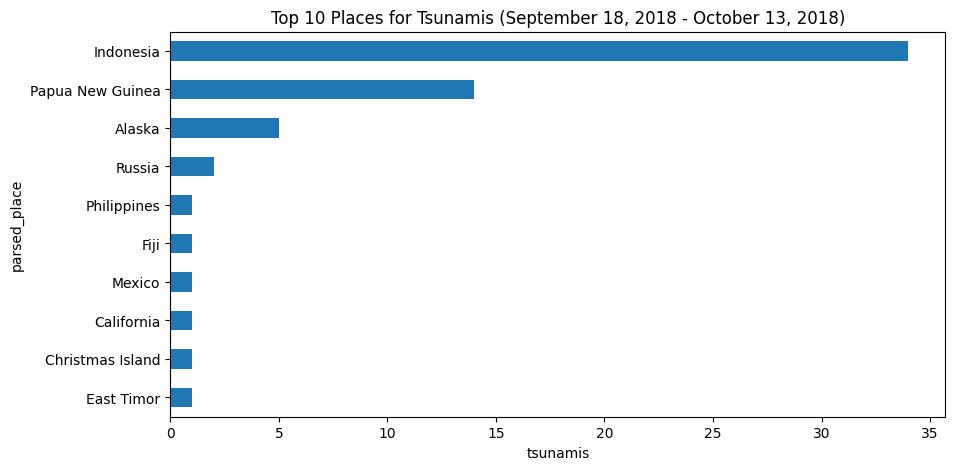

In [41]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(
 kind='barh', figsize=(10, 5),
 title='Top 10 Places for Tsunamis '\
 '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)
plt.show()

Seeing that Indonesia is the top place for tsunamis during the time period we are looking at, we may want to look how many earthquakes and tsunamis Indonesia gets on a
daily basis. We could show this as a line plot or with bars; since this section is about bars, we will use bars here:


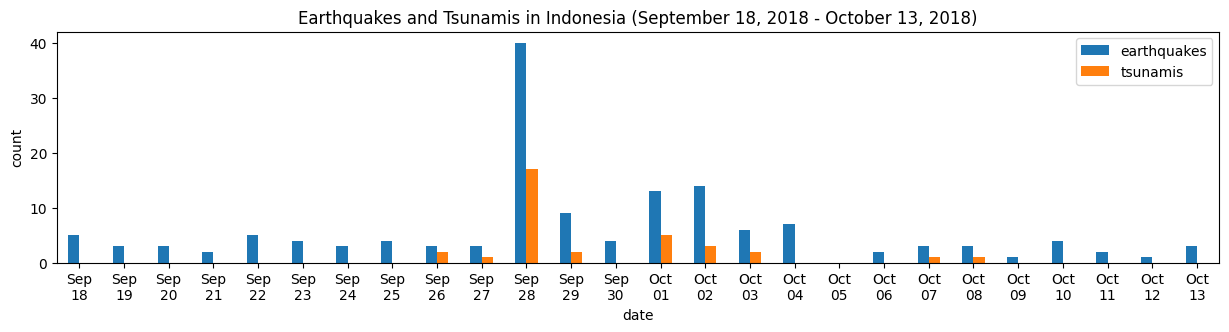

In [42]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
 time=lambda x: pd.to_datetime(x.time, unit='ms'),
 earthquake=1
).set_index('time').resample('1D').sum()
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
indonesia_quakes.plot(
 y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0,
 label=['earthquakes', 'tsunamis'],
 title='Earthquakes and Tsunamis in Indonesia '\
 '(September 18, 2018 - October 13, 2018)'
)
# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')
plt.show()

Using the kind arugment for vertical bars when the labels for each bar are shorter:

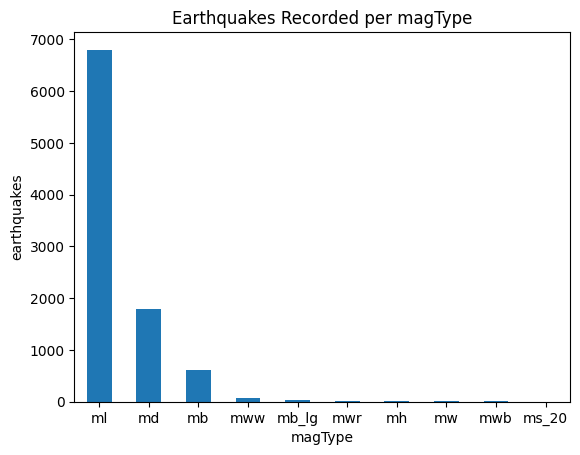

In [43]:

quakes.magType.value_counts().plot(
 kind='bar', title='Earthquakes Recorded per magType', rot=0
)
# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')
plt.show()

Top 4 places with earthquakes:

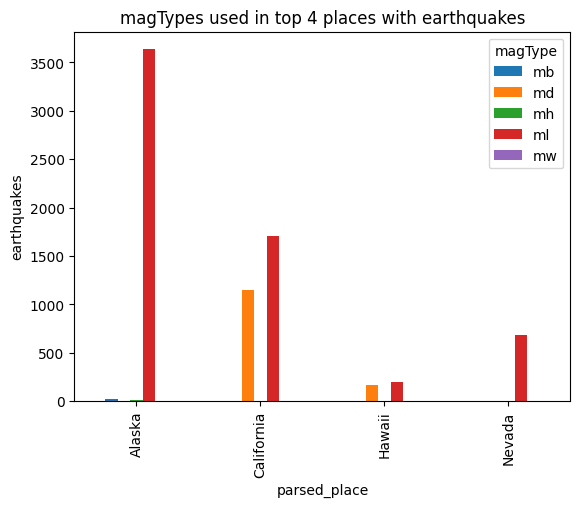

In [44]:
quakes[
 quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])
].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
 title='magTypes used in top 4 places with earthquakes'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)
plt.show()

In [45]:
pivot = quakes.assign(
mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
stacked=True, rot=0,
title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

Text(0, 0.5, 'earthquakes')

## Stacked bar chart

pivot = quakes.assign(
 mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
 index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
 stacked=True, rot=0,
 title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes') # label the axes (discussed in chapter 6)

## Normalized stacked bars


Plot the percentages to be better able to see the different magTypes .

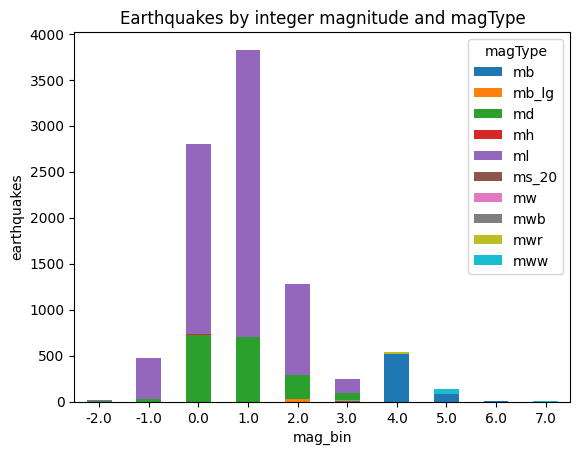

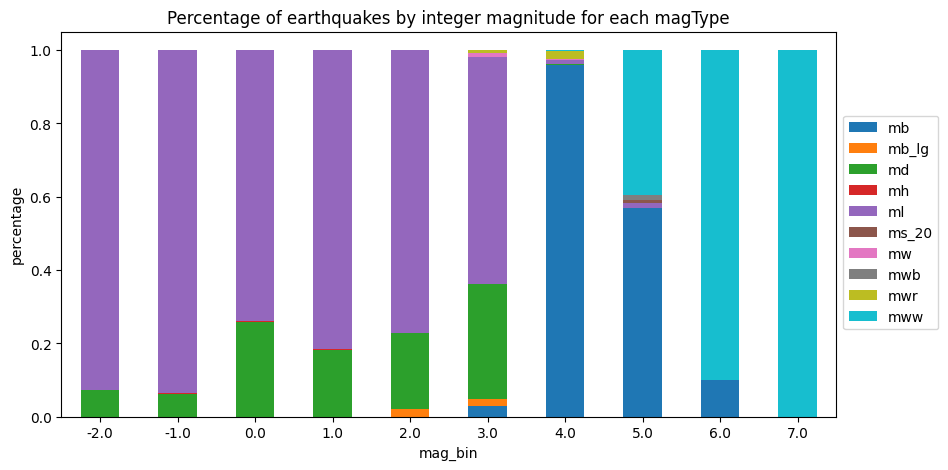

In [46]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
 stacked=True, rot=0, figsize=(10, 5),
 title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)
plt.show()

# 9.3 Pandas Plotting Subpackage

### pandas.plotting subpackage

Pandas provides some extra plotting functions for a few select plot types.

## About the Data

In this notebook, we will be working with Facebook's stock price throughout 2018.

## Setup

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

## Scatter matrix

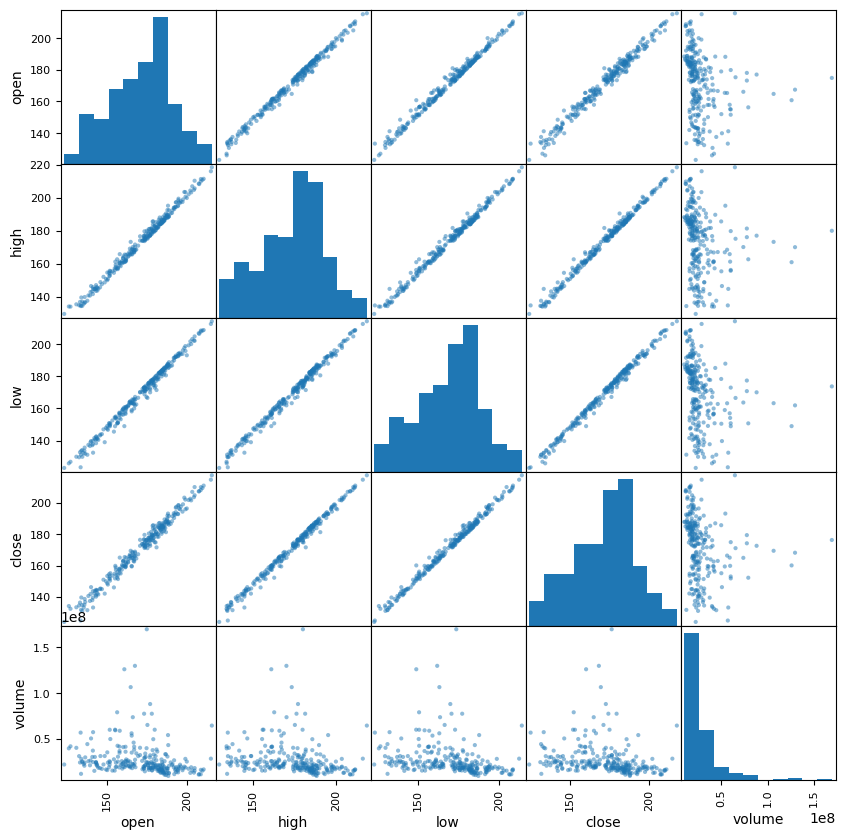

In [48]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))
plt.show()

Changing the diagonal from histrograms to KDE

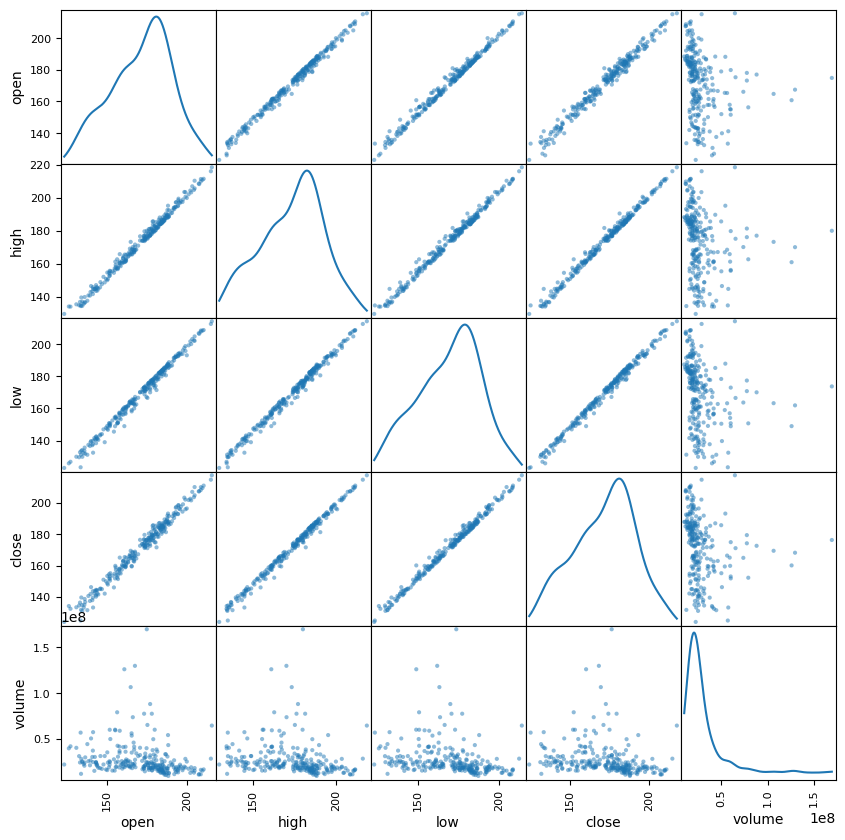

In [49]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')
plt.show()

## Lag plot

Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:

In [50]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a week of trading activity):

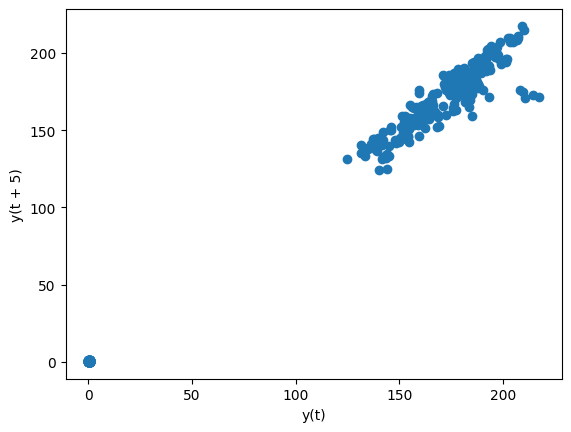

In [51]:
lag_plot(fb.close, lag=5)
plt.show()

## Autocorrelation plots


We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the
bounds below):




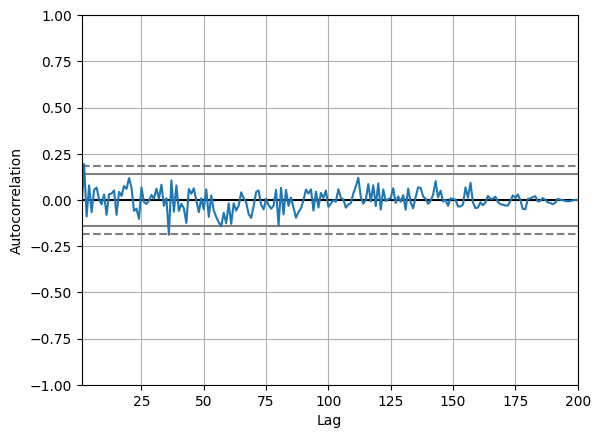

In [52]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))
plt.show()

Stock data, on the other hand, does have significant autocorrelation:

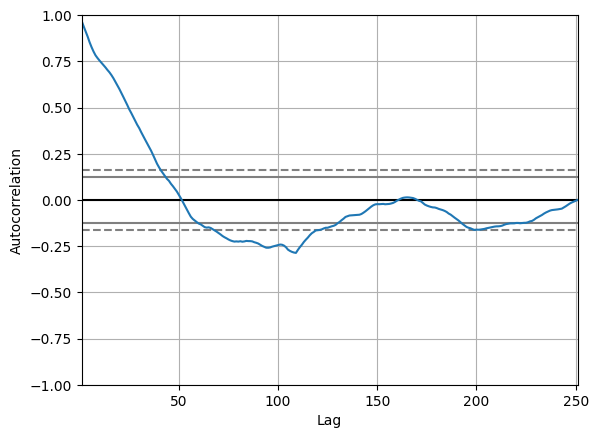

In [53]:
autocorrelation_plot(fb.close)
plt.show()

## Bootstrap plot

This plot helps us understand the uncertainty in our summary statistics:

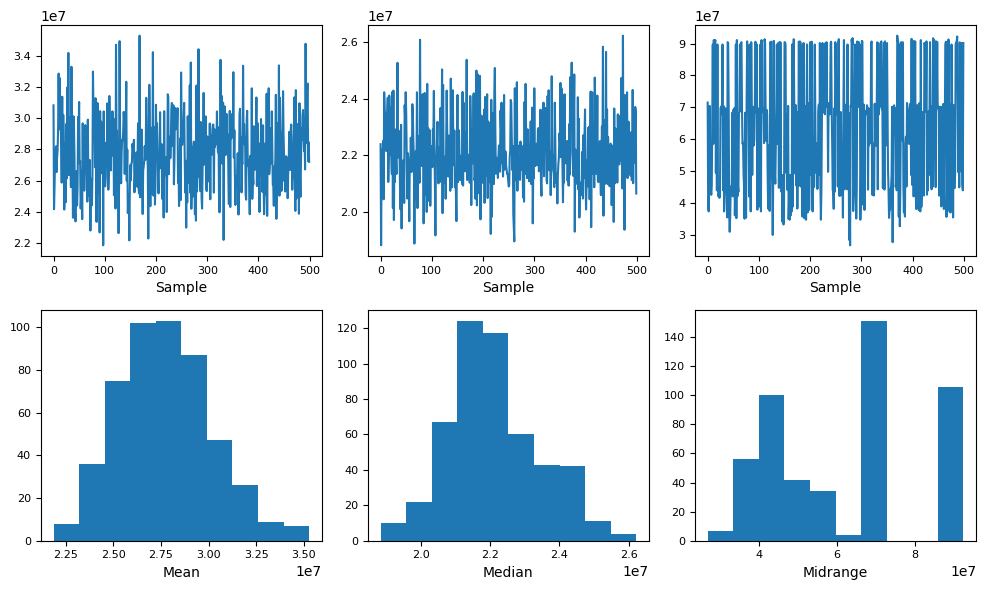

In [54]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))
plt.show()

## Data Analysis:

Provide comments on output from the procedures above.

# Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
fb = pd.read_csv('fb_stock_prices_2018.csv')
# reads the csv file and makes it a dataframe
fb.head(1)

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.55,181.42,18151903


In [57]:
fb['date'] = pd.to_datetime(fb['date'])
fb = fb.set_index('date')
fb.head(1)

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903


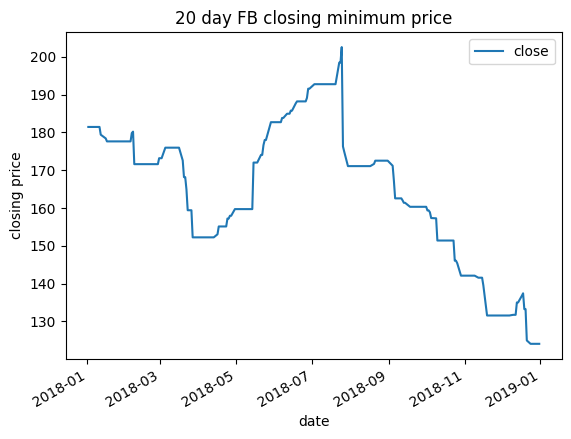

In [58]:
graph = fb.rolling('20D').agg({'close':'min'})



# using mtplotlib to create the graph
graph.plot()
# using plt.title to set the title of the
plt.title('20 day FB closing minimum price')
# setting the name of the xlabel
plt.xlabel('date')
# setting the name of the ylabel
plt.ylabel('closing price')
plt.show()

2 . Create a histogram and KDE of the change from open to close in the price of Facebook stock.

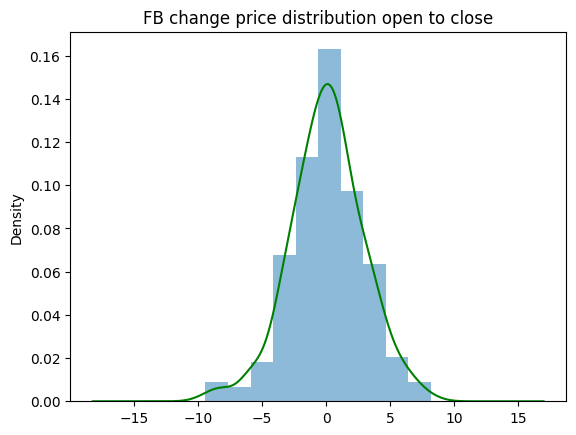

In [59]:
fb = fb.assign(
    change_of_price = fb['close'] - fb['open']
)
ax = fb['change_of_price'].plot(kind='hist', density=True, alpha=0.5)
fb['change_of_price'].plot(kind='kde', ax=ax, color='green')

plt.title('FB change price distribution open to close')
plt.show()

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [60]:
eq = pd.read_csv('earthquakes-1.csv')
eq.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


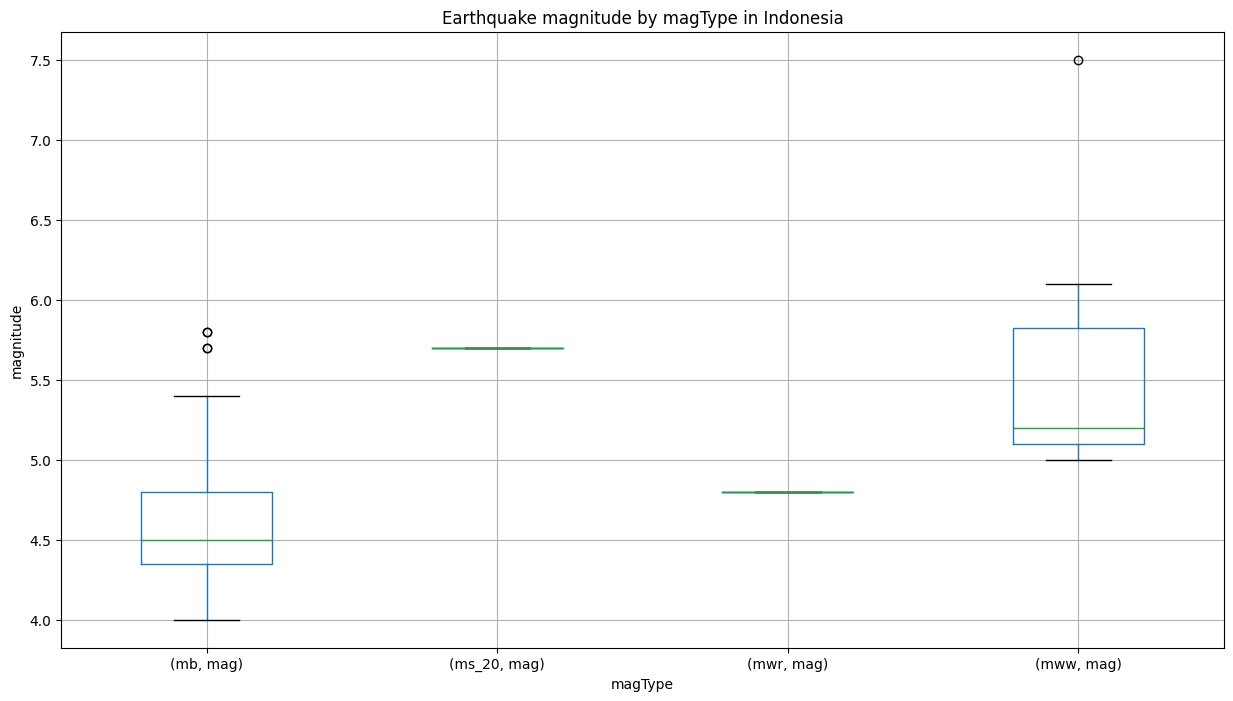

In [61]:
indon = eq.query('parsed_place == "Indonesia"')
indon[['mag', 'magType']].groupby('magType').boxplot(
 figsize=(15, 8), subplots = False
)
plt.title('Earthquake magnitude by magType in Indonesia')
plt.xlabel('magType')
plt.ylabel('magnitude') 
plt.show()

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

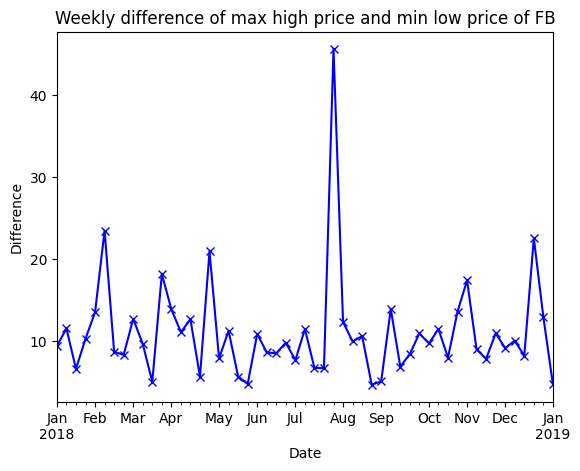

In [62]:
# to make a difference between the max high and min low prices of fb stocks we must resample our dataframe per week 
# aggregate the high and low into max and min values respectively
# then create a new column that will shows the difference between these two columns
weekly = fb.resample('W').agg({
    'high':'max',
    'low':'min'
})

graph3 = weekly.assign(
    difference = weekly['high'] - weekly['low']
)

graph3['difference'].plot(marker = 'x',linestyle = '-', color = 'blue')
plt.title('Weekly difference of max high price and min low price of FB')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

In [63]:
# we will use the shift 1 since we are reffering the previous day
fb['hour_effect'] = fb['open'] - fb['close'].shift(1)
monthly_effect = fb['hour_effect'].resample('ME').sum()

In [64]:
fb.head()

,open,high,low,close,volume,change_of_price,hour_effect
date,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,3.74,NaN
2018-01-03,181.88,184.78,181.3300,184.67,16886563,2.79,0.46
2018-01-04,184.90,186.21,184.0996,184.33,13880896,-0.57,0.23
2018-01-05,185.59,186.90,184.9300,186.85,13574535,1.26,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,1.08,0.35


In [65]:
monthly_effect

date
2018-01-31    -3.3500
2018-02-28     0.0200
2018-03-31   -19.3700
2018-04-30    19.6247
2018-05-31    -2.6488
2018-06-30    -3.6246
2018-07-31   -35.0750
2018-08-31     5.5992
2018-09-30   -14.0150
2018-10-31     3.0950
2018-11-30    -8.5100
2018-12-31    -2.5200
Freq: ME, Name: hour_effect, dtype: float64

- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
    
- The second subplot will be a bar plot showing the net effect this had monthly, using resample().

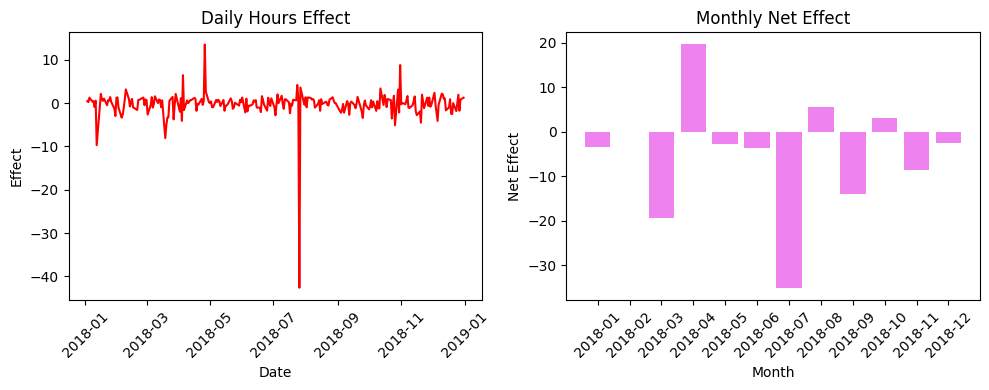

In [66]:
#Graphing

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# line graphing the hour effect
axes[0].plot(fb.index, fb['hour_effect'], color='red')
axes[0].set_title('Daily Hours Effect')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Effect')
axes[0].tick_params(axis = 'x' ,rotation = 45)


# bar graph of the monthly effect
axes[1].bar(monthly_effect.index.strftime('%Y-%m'), monthly_effect.values, color='violet')
axes[1].set_title('Monthly Net Effect')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

- Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

In [67]:
# inorder to do this I need to prepare the condition on what colors should appear if the value is below zero and above zero

colors = ['green' if x >= 0 else 'red' for x in monthly_effect.values]
colors

['red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red']

- Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [68]:
# here we change the x label from date format in three letter month abbreviation

month_label = monthly_effect.index.strftime('%b')
month_label

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name='date')

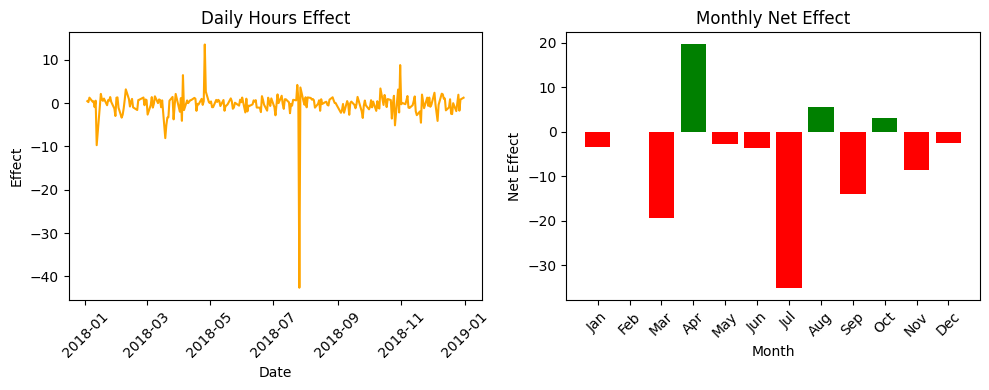

In [69]:
# graphing
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# line graph hour_effect
axes[0].plot(fb.index, fb['hour_effect'], color='orange')
axes[0].set_title('Daily Hours Effect')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Effect')
axes[0].tick_params(axis = 'x' ,rotation = 45)


# bar graph of monthly_effect
axes[1].bar(month_label, monthly_effect.values, color=colors)
axes[1].set_title('Monthly Net Effect')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

## Summary/Conclusion:

Provide a summary of your learnings and the conclusion for this activity.

### I was able to learn how to use the matplotlib library and do visualizations on the dtaframe. This library is very useful since it can create visualizaations if given the correct syntax, which was the hard part of this activity, since the syntax must be correct or else the graph would be wrong, it could result in an error in the code, or an error in the visual itself, this activity is quite hard and I need to memorize the syntax because making a mistake in the syntax could lead to false data, or an error in creating the data